In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
def process_gait_data(file_path):
    scaler = MinMaxScaler()
    df = pd.read_csv(file_path)
    
    if 'Time (s)' in df.columns:
        df.drop(columns=['Time (s)'], inplace=True)
        
    df = df.ffill().bfill() 
    df.replace([np.inf, -np.inf], np.nan, inplace=True)  
    df.dropna(inplace=True) 
    
    data_scaled = scaler.fit_transform(df)
    
    min_val, max_val = np.min(data_scaled), np.max(data_scaled)
    print("Min value:", min_val, "Max value:", max_val)
    
    df_scaled = pd.DataFrame(data_scaled, columns=df.columns)
    return df_scaled, scaler

In [3]:
stance_LA = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-3/Left Stance/LA.csv'
stance_LH = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-3/Left Stance/LH.csv'
stance_LK = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-3/Left Stance/LK.csv'
swing_LA = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-3/Left Swing/LA.csv'
swing_LH = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-3/Left Swing/LH.csv'
swing_LK = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-3/Left Swing/LK.csv'
scaled_stance_LA, scaler_stance_LA = process_gait_data(stance_LA)
scaled_stance_LH, scaler_stance_LH = process_gait_data(stance_LH)
scaled_stance_LK, scaler_stance_LK = process_gait_data(stance_LK)
scaled_swing_LA, scaler_swing_LA = process_gait_data(swing_LA)
scaled_swing_LH, scaler_swing_LH = process_gait_data(swing_LH)
scaled_swing_LK, scaler_swing_LK = process_gait_data(swing_LK)
print(scaled_stance_LA.head())

Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0000000000000002
Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0
   X (m/s^2)  Y (m/s^2)  Z (m/s^2)     Theta
0   0.272727   0.480769   0.361487  0.685165
1   0.272727   0.480769   0.305743  0.732693
2   0.227273   0.500000   0.417230  0.633448
3   0.227273   0.480769   0.390203  0.660321
4   0.204545   0.480769   0.361487  0.684849


In [4]:

def create_sequences(data, seq_length):
    sequences = []
    data = np.array(data)  
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((seq, target))
    return sequences


seq_length = 10
sequences_ST_LA = create_sequences(scaled_stance_LA, seq_length)
sequences_ST_LH = create_sequences(scaled_stance_LH, seq_length)
sequences_ST_LK = create_sequences(scaled_stance_LK, seq_length)
sequences_SW_LA = create_sequences(scaled_swing_LA, seq_length)
sequences_SW_LH = create_sequences(scaled_swing_LH, seq_length)
sequences_SW_LK = create_sequences(scaled_swing_LK, seq_length)

In [5]:
def extract_X_y(sequences):
    X = np.array([seq[0] for seq in sequences])
    y = np.array([seq[1] for seq in sequences])
    return X, y

X_ST_LA, y_ST_LA = extract_X_y(sequences_ST_LA)
X_ST_LH, y_ST_LH = extract_X_y(sequences_ST_LH)
X_ST_LK, y_ST_LK = extract_X_y(sequences_ST_LK)
X_SW_LA, y_SW_LA = extract_X_y(sequences_SW_LA)
X_SW_LH, y_SW_LH = extract_X_y(sequences_SW_LH)
X_SW_LK, y_SW_LK = extract_X_y(sequences_SW_LK)

print(f"X_ST_LA shape: {X_ST_LA.shape}, y_ST_LA shape: {y_ST_LA.shape}")
print(np.isnan(X_ST_LA).sum(), np.isnan(y_ST_LA).sum())  
print(np.isinf(X_ST_LA).sum(), np.isinf(y_ST_LA).sum())  

print(f"X_ST_LH shape: {X_ST_LH.shape}, y_ST_LH shape: {y_ST_LH.shape}")
print(np.isnan(X_ST_LH).sum(), np.isnan(y_ST_LH).sum())  
print(np.isinf(X_ST_LH).sum(), np.isinf(y_ST_LH).sum())  

print(f"X_ST_LK shape: {X_ST_LK.shape}, y_ST_LK shape: {y_ST_LK.shape}")
print(np.isnan(X_ST_LK).sum(), np.isnan(y_ST_LK).sum())  
print(np.isinf(X_ST_LK).sum(), np.isinf(y_ST_LK).sum())  

print(f"X_SW_LA shape: {X_SW_LA.shape}, y_SW_LA shape: {y_SW_LA.shape}")
print(np.isnan(X_SW_LA).sum(), np.isnan(y_SW_LA).sum())  
print(np.isinf(X_SW_LA).sum(), np.isinf(y_SW_LA).sum())  

print(f"X_SW_LH shape: {X_SW_LH.shape}, y_SW_LH shape: {y_SW_LH.shape}")
print(np.isnan(X_SW_LH).sum(), np.isnan(y_SW_LH).sum())  
print(np.isinf(X_SW_LH).sum(), np.isinf(y_SW_LH).sum())  

print(f"X_SW_LK shape: {X_SW_LK.shape}, y_SW_LK shape: {y_SW_LK.shape}")
print(np.isnan(X_SW_LK).sum(), np.isnan(y_SW_LK).sum())  
print(np.isinf(X_SW_LK).sum(), np.isinf(y_SW_LK).sum())  



X_ST_LA shape: (192, 10, 4), y_ST_LA shape: (192, 4)
0 0
0 0
X_ST_LH shape: (92, 10, 4), y_ST_LH shape: (92, 4)
0 0
0 0
X_ST_LK shape: (92, 10, 4), y_ST_LK shape: (92, 4)
0 0
0 0
X_SW_LA shape: (191, 10, 4), y_SW_LA shape: (191, 4)
0 0
0 0
X_SW_LH shape: (91, 10, 4), y_SW_LH shape: (91, 4)
0 0
0 0
X_SW_LK shape: (91, 10, 4), y_SW_LK shape: (91, 4)
0 0
0 0


In [6]:

def split_train_test(X, y, train_size=0.8):
    split_index = int(len(X) * train_size)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    return X_train, X_test, y_train, y_test


X_train_ST_LA, X_test_ST_LA, y_train_ST_LA, y_test_ST_LA = split_train_test(X_ST_LA, y_ST_LA)
X_train_ST_LH, X_test_ST_LH, y_train_ST_LH, y_test_ST_LH = split_train_test(X_ST_LH, y_ST_LH)
X_train_ST_LK, X_test_ST_LK, y_train_ST_LK, y_test_ST_LK = split_train_test(X_ST_LK, y_ST_LK)
X_train_SW_LA, X_test_SW_LA, y_train_SW_LA, y_test_SW_LA = split_train_test(X_SW_LA, y_SW_LA)
X_train_SW_LH, X_test_SW_LH, y_train_SW_LH, y_test_SW_LH = split_train_test(X_SW_LH, y_SW_LH)
X_train_SW_LK, X_test_SW_LK, y_train_SW_LK, y_test_SW_LK = split_train_test(X_SW_LK, y_SW_LK)

In [7]:

print(X_train_ST_LA.shape)
print(X_train_ST_LH.shape)
print(X_train_ST_LK.shape)
print(X_train_SW_LA.shape)
print(X_train_SW_LH.shape)
print(X_train_SW_LK.shape)

(153, 10, 4)
(73, 10, 4)
(73, 10, 4)
(152, 10, 4)
(72, 10, 4)
(72, 10, 4)


In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

2024-09-17 18:55:38.796091: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-17 18:55:38.796138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-17 18:55:38.797543: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
# GRU model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, activation='tanh', return_sequences=True, input_shape=input_shape))
    model.add(GRU(50, activation='tanh'))
    model.add(Dense(input_shape[-1]))
    model.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0), loss='mse')
    return model

In [10]:
# # Prepare input shape
# input_shape = (X_train_LK.shape[1], X_train_LK.shape[2])

# gru_model = create_gru_model(input_shape)
# gru_model.summary()

In [11]:
def train_gru_for_joint(X_train, y_train, joint_name):
    input_shape = (X_train.shape[1], X_train.shape[2])
    gru_model = create_gru_model(input_shape)
    print(f"Training GRU model for {joint_name}...")
    gru_model.summary()
    history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
    return history, gru_model


In [12]:

histories = {}
models = {}


joint_data = {
    'ST_LA': (X_train_ST_LA, y_train_ST_LA),
    'ST_LH': (X_train_ST_LH, y_train_ST_LH),
    'ST_LK': (X_train_ST_LK, y_train_ST_LK),
    'SW_LA': (X_train_SW_LA, y_train_SW_LA),
    'SW_LH': (X_train_SW_LH, y_train_SW_LH),
    'SW_LK': (X_train_SW_LK, y_train_SW_LK)
}

In [13]:

for joint, (X_train, y_train) in joint_data.items():
    history, model = train_gru_for_joint(X_train, y_train, joint)
    histories[joint] = history
    models[joint] = model
    
print(histories)
print(models)

Training GRU model for ST_LA...


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - loss: 0.2625 - val_loss: 0.1731
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0898 - val_loss: 0.1141
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0250 - val_loss: 0.1204
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0272 - val_loss: 0.1200
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0235 - val_loss: 0.1054
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0160 - val_loss: 0.0946
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0125 - val_loss: 0.0873
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0120 - val_loss: 0.0831
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0122 - val_loss: 0.0805
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0092 - val_loss: 0.0787
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0078 - val_loss: 0.0784
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0078 - val_loss: 0.0764


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - loss: 0.1772 - val_loss: 0.1918
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1010 - val_loss: 0.1106
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0625 - val_loss: 0.0643
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0359 - val_loss: 0.0478
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0324 - val_loss: 0.0478
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0318 - val_loss: 0.0507
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0337 - val_loss: 0.0501
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0310 - val_loss: 0.0472
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0275 - val_loss: 0.0437
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0220 - val_loss: 0.0407
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0177 - val_loss: 0.0389
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0170 - val_loss: 0.0378


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - loss: 0.2121 - val_loss: 0.1177
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1247 - val_loss: 0.0712
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0769 - val_loss: 0.0472
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0515 - val_loss: 0.0421
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - val_loss: 0.0484
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0396 - val_loss: 0.0546
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0401 - val_loss: 0.0557
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0357 - val_loss: 0.0529
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0355 - val_loss: 0.0482
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0295 - val_loss: 0.0436
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0253 - val_loss: 0.0405
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0239 - val_loss: 0.0394


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.2436 - val_loss: 0.0828
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0894 - val_loss: 0.0049
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0216 - val_loss: 0.0172
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0375 - val_loss: 0.0201
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0328 - val_loss: 0.0051
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0189 - val_loss: 0.0020
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0194 - val_loss: 0.0028
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0227 - val_loss: 0.0024
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0174 - val_loss: 8.5276e-04
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0174 - val_loss: 5.9665e-04
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0141 - val_loss: 0.0013
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0117 - val_loss: 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - loss: 0.2399 - val_loss: 0.3607
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1815 - val_loss: 0.3020
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1196 - val_loss: 0.2518
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0864 - val_loss: 0.2101
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0508 - val_loss: 0.1808
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0379 - val_loss: 0.1656
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0468 - val_loss: 0.1552
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0512 - val_loss: 0.1459
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0494 - val_loss: 0.1369
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0421 - val_loss: 0.1325
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0347 - val_loss: 0.1325
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0327 - val_loss: 0.1340


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                    │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - loss: 0.2835 - val_loss: 0.1709
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2040 - val_loss: 0.1105
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1467 - val_loss: 0.0639
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0842 - val_loss: 0.0325
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0579 - val_loss: 0.0182
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0442 - val_loss: 0.0204
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0489 - val_loss: 0.0286
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0520 - val_loss: 0.0295
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0522 - val_loss: 0.0227
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0444 - val_loss: 0.0158
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - val_loss: 0.0132
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0324 - val_loss: 0.0153


In [14]:
print(histories)
print(models)

{'ST_LA': <keras.src.callbacks.history.History object at 0x78dec579d360>, 'ST_LH': <keras.src.callbacks.history.History object at 0x78de2017dbd0>, 'ST_LK': <keras.src.callbacks.history.History object at 0x78ddec35bfa0>, 'SW_LA': <keras.src.callbacks.history.History object at 0x78ddd46d63e0>, 'SW_LH': <keras.src.callbacks.history.History object at 0x78ddd42a54e0>, 'SW_LK': <keras.src.callbacks.history.History object at 0x78ddca5a2c50>}
{'ST_LA': <Sequential name=sequential, built=True>, 'ST_LH': <Sequential name=sequential_1, built=True>, 'ST_LK': <Sequential name=sequential_2, built=True>, 'SW_LA': <Sequential name=sequential_3, built=True>, 'SW_LH': <Sequential name=sequential_4, built=True>, 'SW_LK': <Sequential name=sequential_5, built=True>}


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Evaluate models
def evaluate_model(model, X_test, y_test,scaler ,model_name):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    print(f'{model_name} - Mean Squared Error: {mse}')
    print(f'{model_name} - Mean Absolute Error: {mae}')
    predictions_inverse = scaler.inverse_transform(predictions)
    print(X_test.shape)
    print(predictions.shape)
    print(predictions_inverse.shape)
    return predictions_inverse

In [16]:
# Plot results
def plot_predictions(y_test_inverse, predictions_inverse, feature_index, model_name, joint_name):
    plt.figure(figsize=(14, 7))
    
    # Plot true values vs predictions
    plt.plot(y_test_inverse[:, feature_index], label='True Values')
    plt.plot(predictions_inverse[:, feature_index], label=f'{model_name} Predictions')
    
    plt.xlabel('Time')
    plt.ylabel('X (m/s2)')
    plt.title(f'True Values vs {model_name} Predictions for X (m/s2) - {joint_name}')
    plt.legend()
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
GRU for ST_LA - Mean Squared Error: 0.008074226445155609
GRU for ST_LA - Mean Absolute Error: 0.07007742789924018
(39, 10, 4)
(39, 4)
(39, 4)


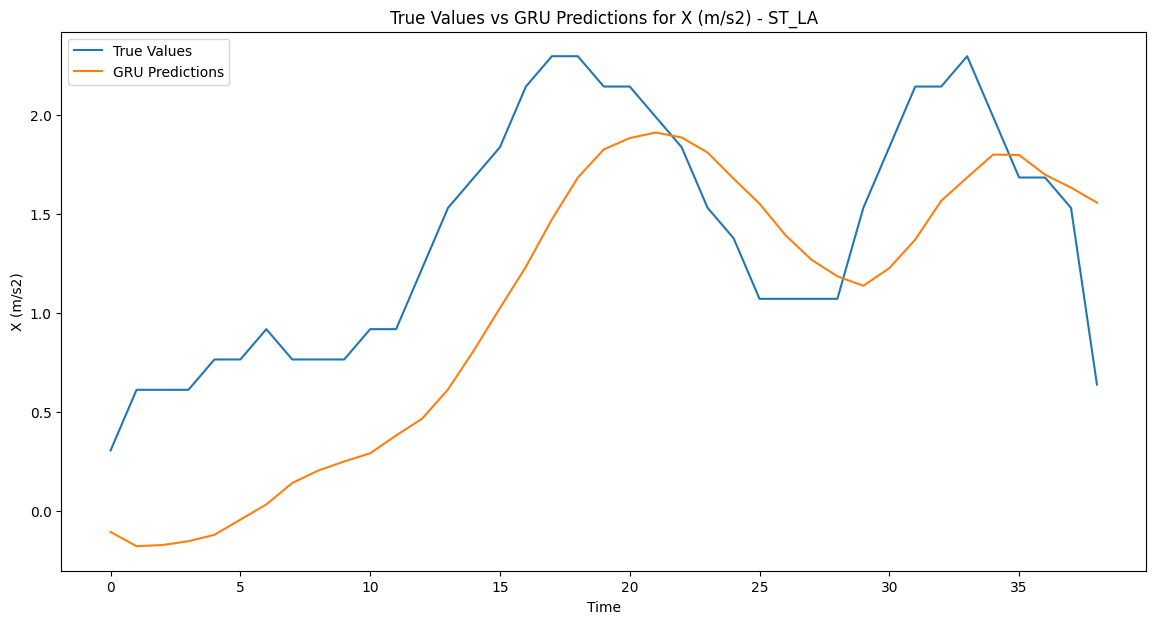

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
GRU for ST_LH - Mean Squared Error: 0.021081466941914817
GRU for ST_LH - Mean Absolute Error: 0.11211922544344737
(19, 10, 4)
(19, 4)
(19, 4)


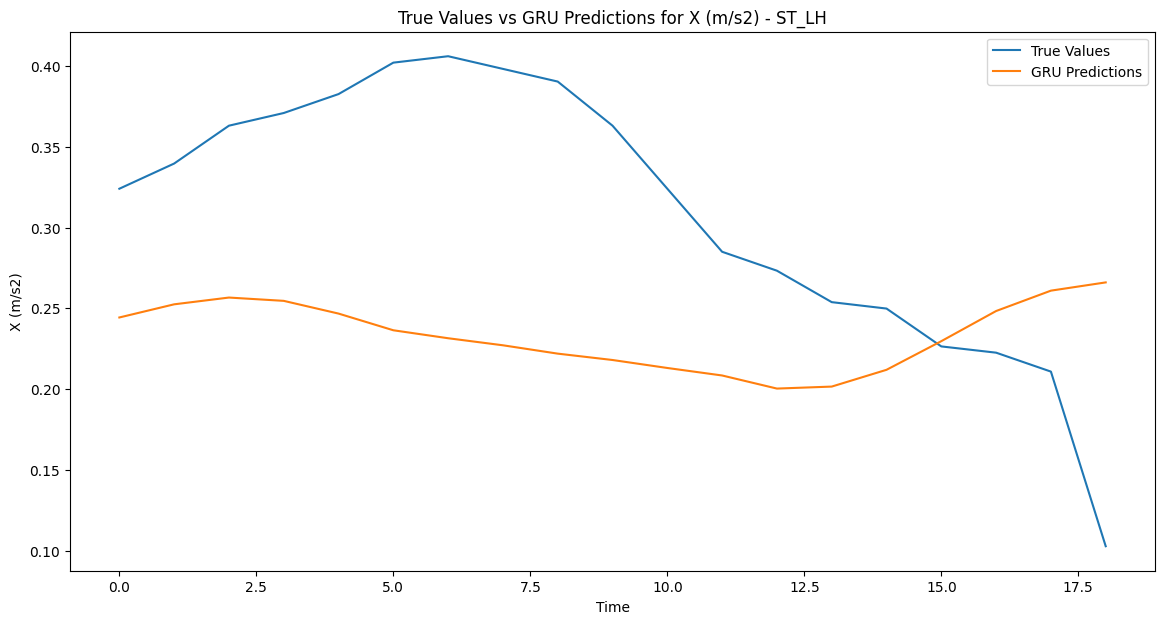

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
GRU for ST_LK - Mean Squared Error: 0.0034918093859027744
GRU for ST_LK - Mean Absolute Error: 0.045836167967244365
(19, 10, 4)
(19, 4)
(19, 4)


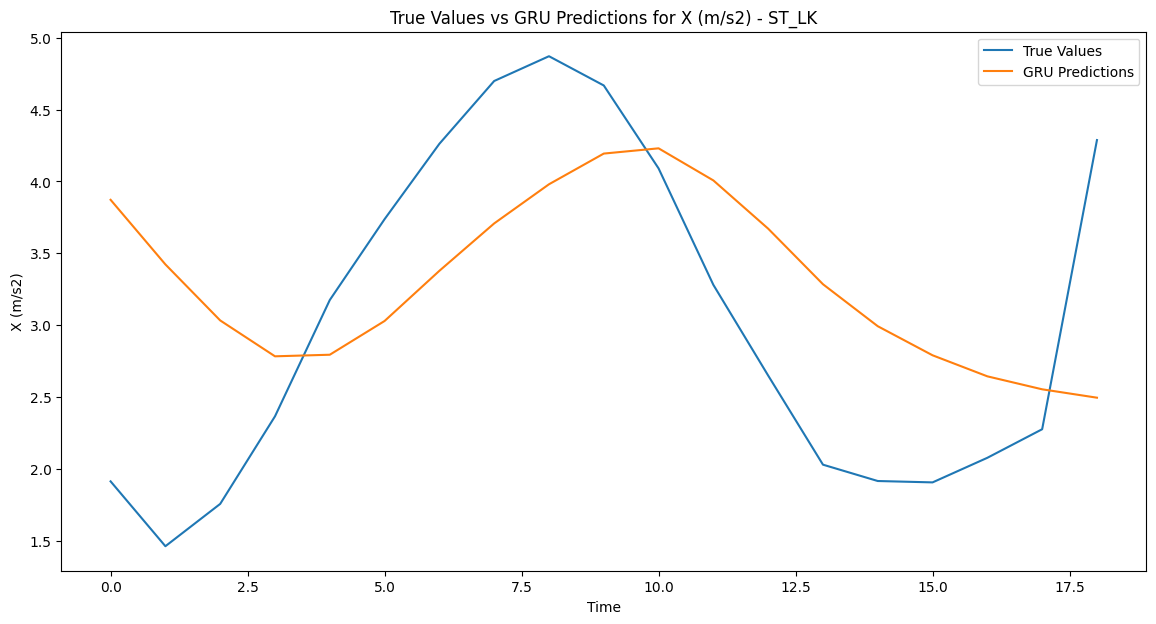

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
GRU for SW_LA - Mean Squared Error: 0.0002899307036075214
GRU for SW_LA - Mean Absolute Error: 0.013508508930198723
(39, 10, 4)
(39, 4)
(39, 4)


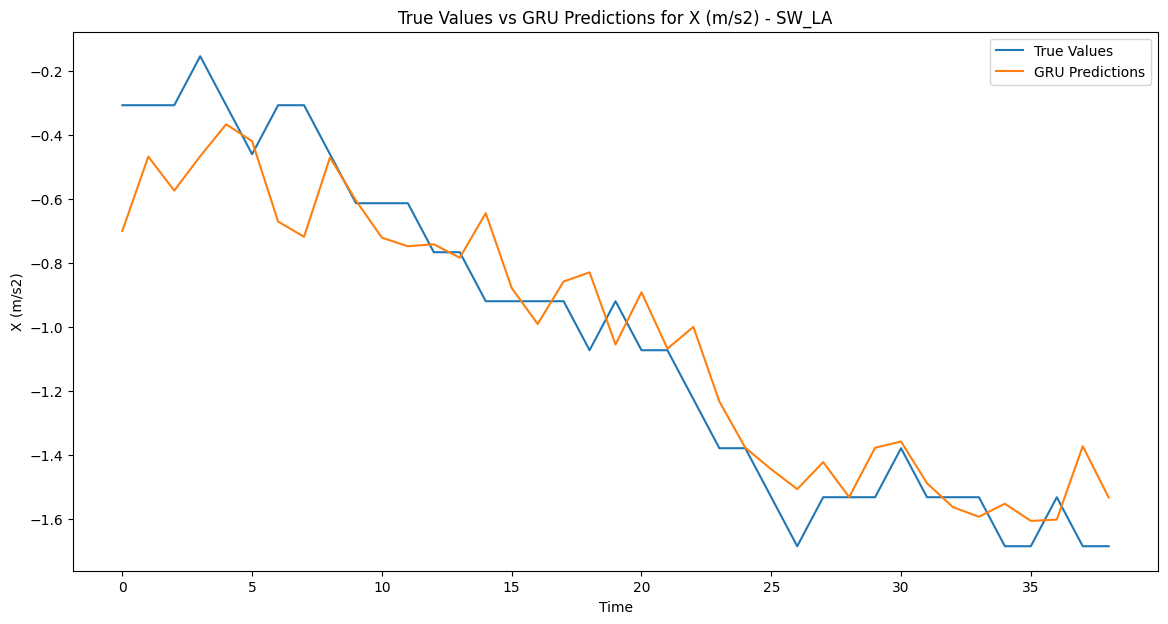

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
GRU for SW_LH - Mean Squared Error: 0.024719484385663376
GRU for SW_LH - Mean Absolute Error: 0.1276521063234995
(19, 10, 4)
(19, 4)
(19, 4)


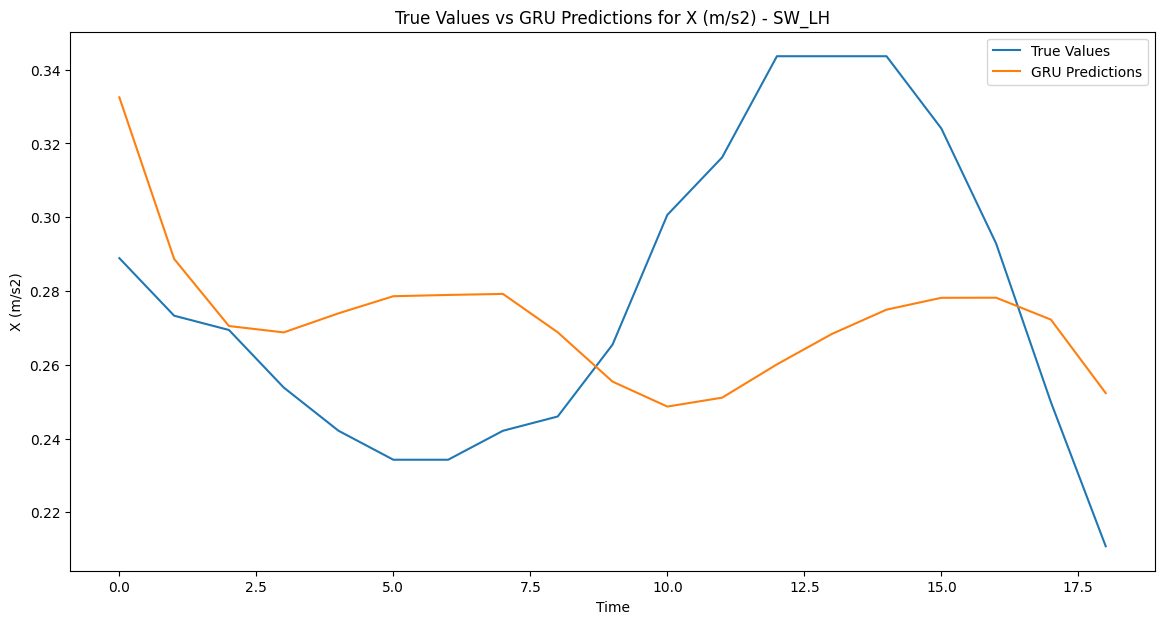

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
GRU for SW_LK - Mean Squared Error: 0.010299036967284436
GRU for SW_LK - Mean Absolute Error: 0.08090009157884656
(19, 10, 4)
(19, 4)
(19, 4)


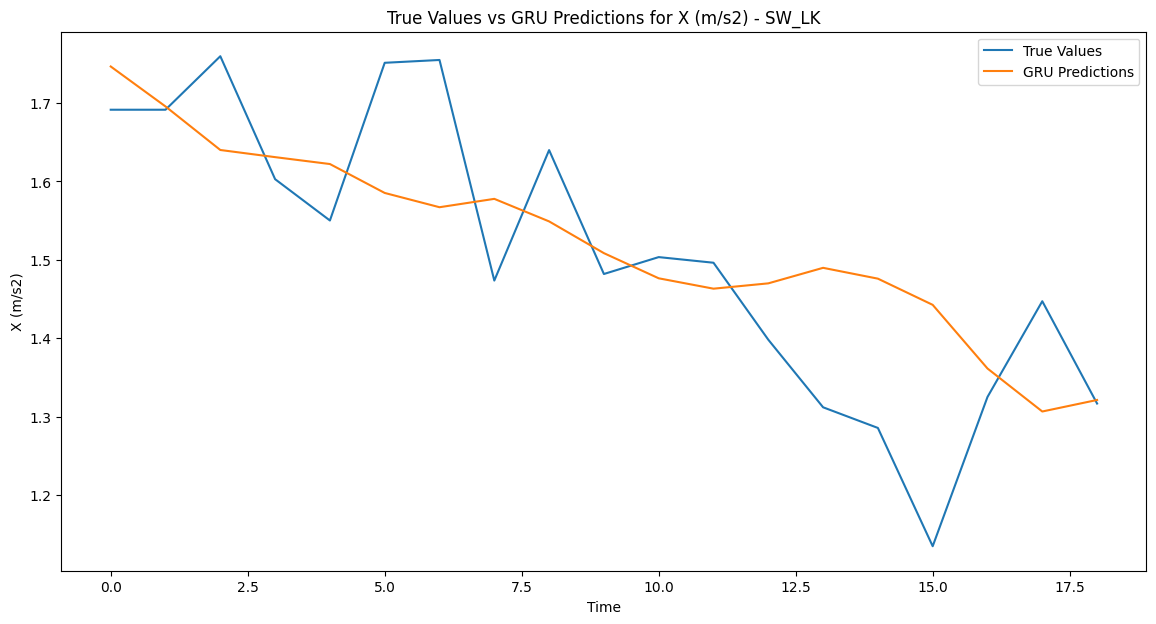

In [17]:

joint_data = {
    'ST_LA': (X_test_ST_LA, y_test_ST_LA, scaler_stance_LA),
    'ST_LH': (X_test_ST_LH, y_test_ST_LH, scaler_stance_LH),
    'ST_LK': (X_test_ST_LK, y_test_ST_LK, scaler_stance_LK),
    'SW_LA': (X_test_SW_LA, y_test_SW_LA, scaler_swing_LA),
    'SW_LH': (X_test_SW_LH, y_test_SW_LH, scaler_swing_LH),
    'SW_LK': (X_test_SW_LK, y_test_SW_LK, scaler_swing_LK)
}


for joint, (X_test, y_test, scaler) in joint_data.items():
    model = models[joint]
    

    if hasattr(scaler, 'min_'):

        predictions_inverse = evaluate_model(model, X_test, y_test, scaler, f'GRU for {joint}')
        

        y_test_inverse = scaler.inverse_transform(y_test)
        
        # Choose the feature index to plot (0 for X (m/s²))
        feature_index = 0
        
        # Plot true values vs predictions
        plot_predictions(y_test_inverse, predictions_inverse, feature_index, 'GRU', joint)
    else:
        print(f"Scaler for {joint} has not been fitted.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU for ST_LK - Mean Squared Error: 0.0034918093859027744
GRU for ST_LK - Mean Absolute Error: 0.045836167967244365
(19, 10, 4)
(19, 4)
(19, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU for SW_LK - Mean Squared Error: 0.010299036967284436
GRU for SW_LK - Mean Absolute Error: 0.08090009157884656
(19, 10, 4)
(19, 4)
(19, 4)


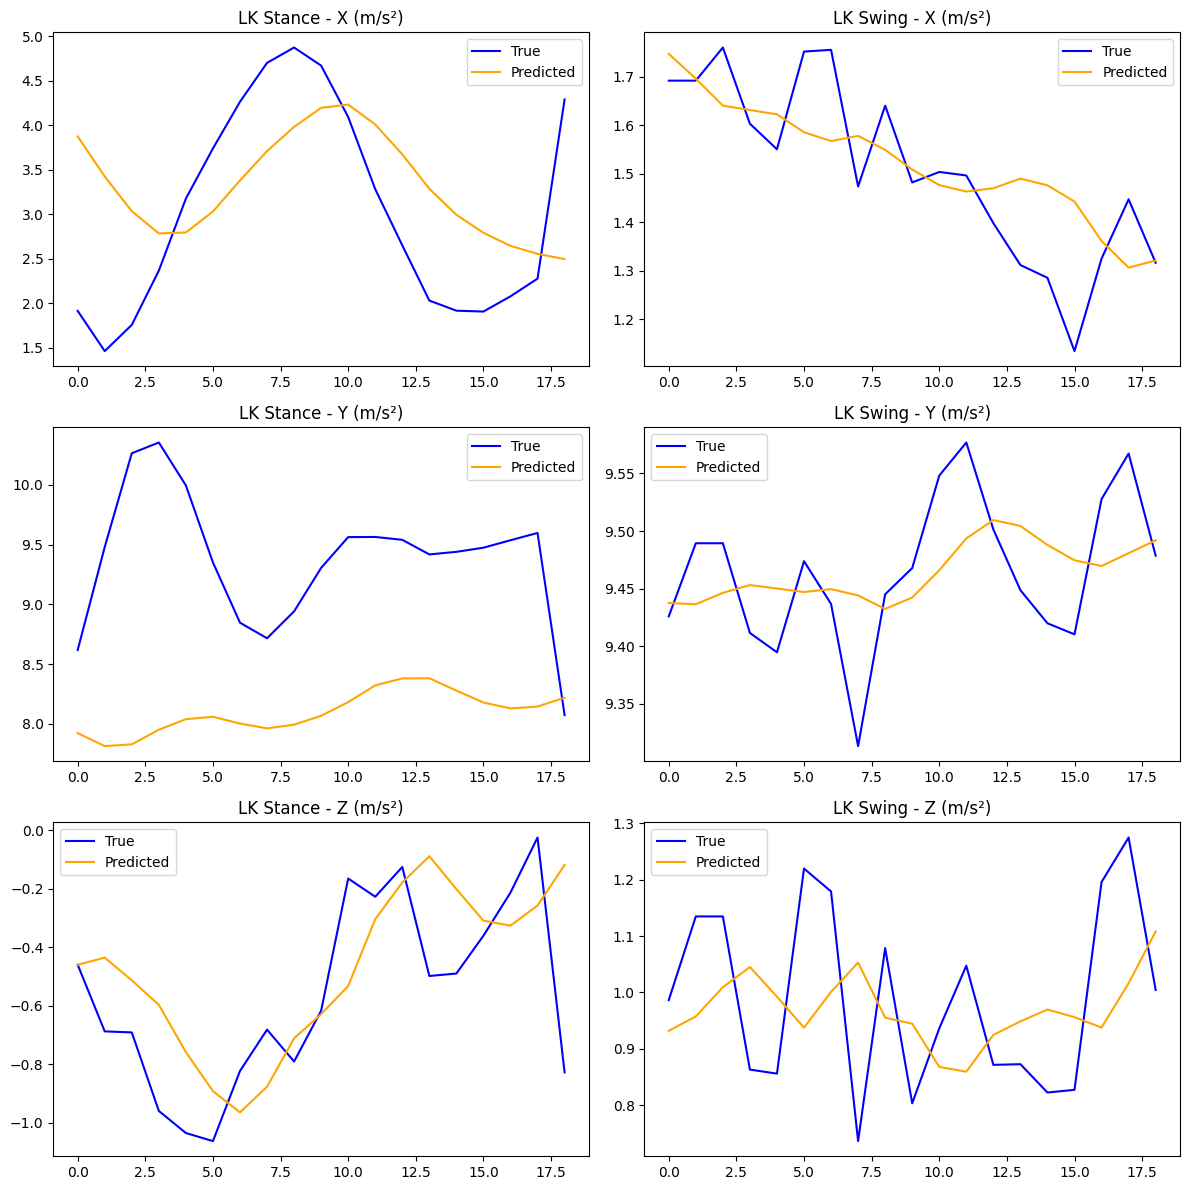

In [18]:
import matplotlib.pyplot as plt

def plot_joint_predictions(joint, y_test_inverse_stance, predictions_inverse_stance, y_test_inverse_swing, predictions_inverse_swing):

    fig, axes = plt.subplots(3, 2, figsize=(12, 12))


    axes_labels = ['X (m/s²)', 'Y (m/s²)', 'Z (m/s²)']
    
    for i in range(3):  # For X, Y, and Z axis

        axes[i, 0].plot(y_test_inverse_stance[:, i], label='True', color='blue')
        axes[i, 0].plot(predictions_inverse_stance[:, i], label='Predicted', color='orange')
        axes[i, 0].set_title(f'{joint} Stance - {axes_labels[i]}')
        axes[i, 0].legend()
        

        axes[i, 1].plot(y_test_inverse_swing[:, i], label='True', color='blue')
        axes[i, 1].plot(predictions_inverse_swing[:, i], label='Predicted', color='orange')
        axes[i, 1].set_title(f'{joint} Swing - {axes_labels[i]}')
        axes[i, 1].legend()


    plt.tight_layout()
    plt.show()


y_test_inverse_stance_LK = scaler_stance_LK.inverse_transform(y_test_ST_LK)
y_test_inverse_swing_LK = scaler_swing_LK.inverse_transform(y_test_SW_LK)

predictions_inverse_stance_LK = evaluate_model(models['ST_LK'], X_test_ST_LK, y_test_ST_LK, scaler_stance_LK, 'GRU for ST_LK')
predictions_inverse_swing_LK = evaluate_model(models['SW_LK'], X_test_SW_LK, y_test_SW_LK, scaler_swing_LK, 'GRU for SW_LK')


plot_joint_predictions('LK', y_test_inverse_stance_LK, predictions_inverse_stance_LK, y_test_inverse_swing_LK, predictions_inverse_swing_LK)




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
GRU for ST_LA - Mean Squared Error: 0.008074226445155609
GRU for ST_LA - Mean Absolute Error: 0.07007742789924018
(39, 10, 4)
(39, 4)
(39, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
GRU for SW_LA - Mean Squared Error: 0.0002899307036075214
GRU for SW_LA - Mean Absolute Error: 0.013508508930198723
(39, 10, 4)
(39, 4)
(39, 4)


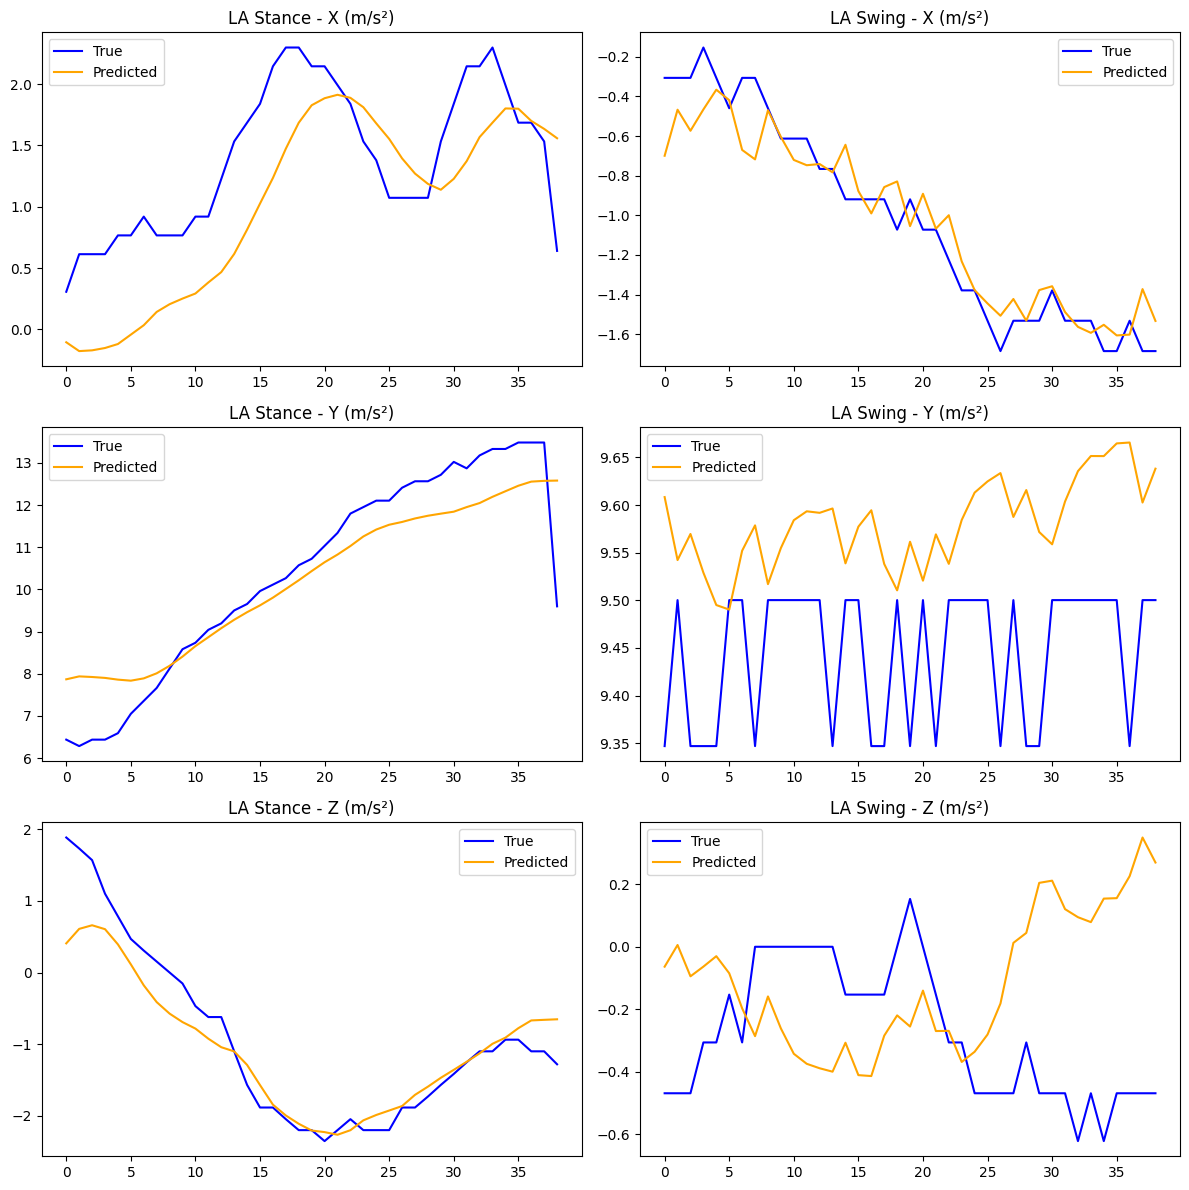

In [19]:

y_test_inverse_stance_LA = scaler_stance_LA.inverse_transform(y_test_ST_LA)
y_test_inverse_swing_LA = scaler_swing_LA.inverse_transform(y_test_SW_LA)

predictions_inverse_stance_LA = evaluate_model(models['ST_LA'], X_test_ST_LA, y_test_ST_LA, scaler_stance_LA, 'GRU for ST_LA')
predictions_inverse_swing_LA = evaluate_model(models['SW_LA'], X_test_SW_LA, y_test_SW_LA, scaler_swing_LA, 'GRU for SW_LA')


plot_joint_predictions('LA', y_test_inverse_stance_LA, predictions_inverse_stance_LA, y_test_inverse_swing_LA, predictions_inverse_swing_LA)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU for ST_LH - Mean Squared Error: 0.021081466941914817
GRU for ST_LH - Mean Absolute Error: 0.11211922544344737
(19, 10, 4)
(19, 4)
(19, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU for SW_LH - Mean Squared Error: 0.024719484385663376
GRU for SW_LH - Mean Absolute Error: 0.1276521063234995
(19, 10, 4)
(19, 4)
(19, 4)


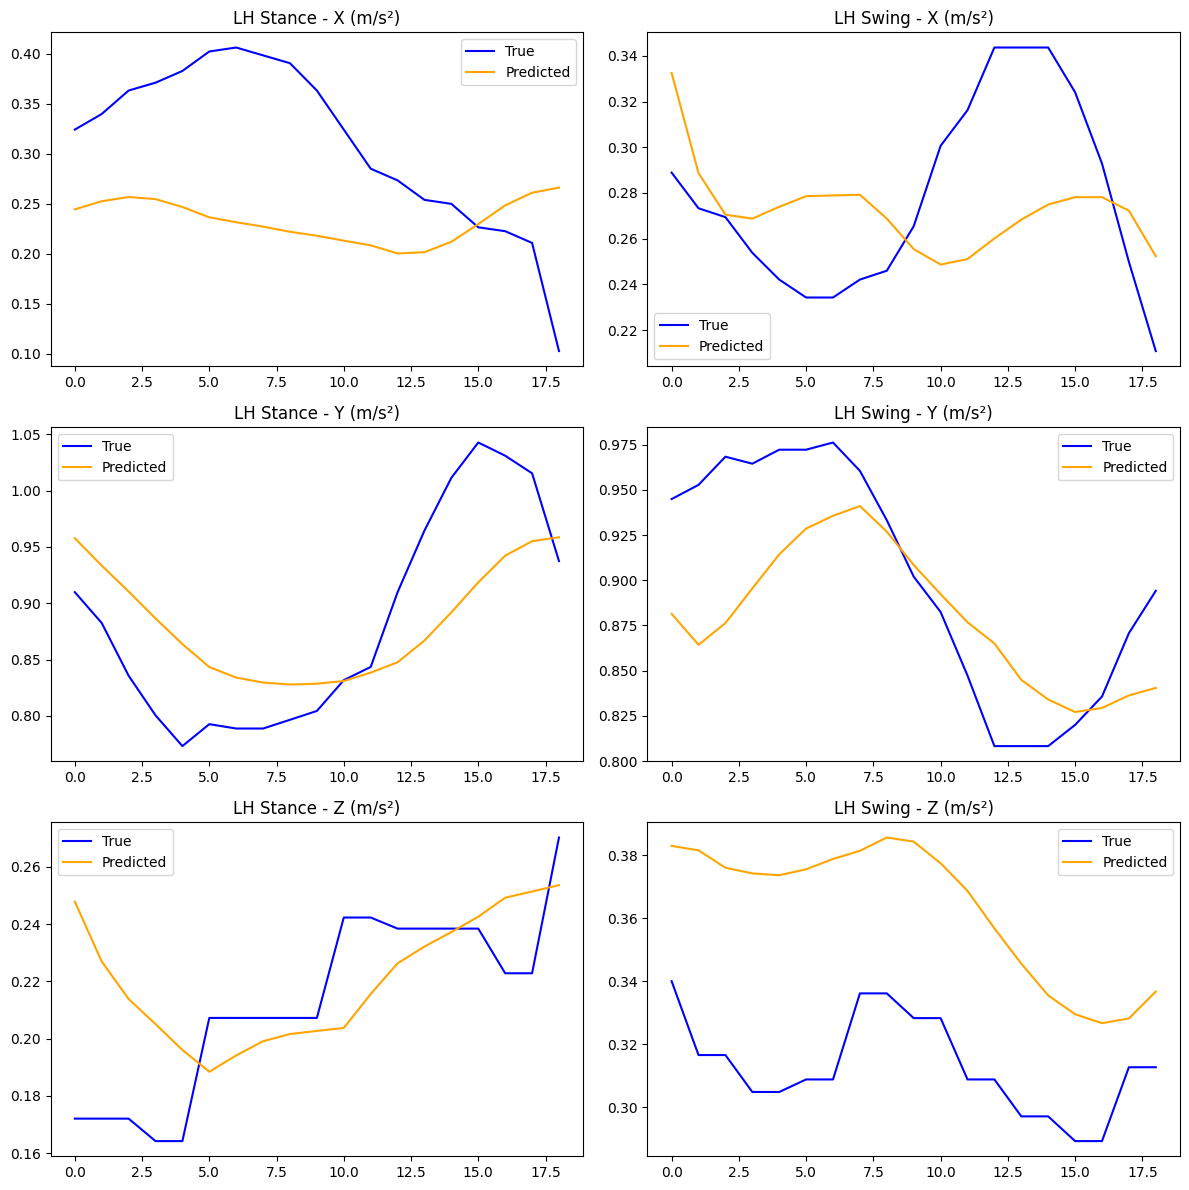

In [20]:

y_test_inverse_stance_LH = scaler_stance_LH.inverse_transform(y_test_ST_LH)
y_test_inverse_swing_LH = scaler_swing_LH.inverse_transform(y_test_SW_LH)

predictions_inverse_stance_LH = evaluate_model(models['ST_LH'], X_test_ST_LH, y_test_ST_LH, scaler_stance_LH, 'GRU for ST_LH')
predictions_inverse_swing_LH = evaluate_model(models['SW_LH'], X_test_SW_LH, y_test_SW_LH, scaler_swing_LH, 'GRU for SW_LH')


plot_joint_predictions('LH', y_test_inverse_stance_LH, predictions_inverse_stance_LH, y_test_inverse_swing_LH, predictions_inverse_swing_LH)
